In [1]:
import os
import sys
sys.path.insert(0, os.path.abspath('..'))
sys.path.insert(0, os.path.abspath('../algorithms'))
import matplotlib.pyplot as plt

import numpy as np
from sklearn.model_selection import train_test_split
from algorithms import supportvector
from supportvector import SVC, SVC_multi

mushroom_train_data = np.genfromtxt('../mushroom_images/mushroom_image_train_color_data.csv', delimiter=",")
mushroom_train_target = np.genfromtxt('../mushroom_images/mushroom_image_train_color_target.csv', delimiter=",")
mushroom_test_data = np.genfromtxt('../mushroom_images/mushroom_image_test_color_data.csv', delimiter=",")
mushroom_test_target = np.genfromtxt('../mushroom_images/mushroom_image_test_color_target.csv', delimiter=",")
    
mushroom_edibility = [0,1,0,0,1,1]

from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import chi2, f_classif
from sklearn.preprocessing import StandardScaler


#fValue_selector = SelectKBest(chi2,k=8)
#fValue_selector.fit(mushroom_train_data, mushroom_train_target)
#mushroom_train_data = fValue_selector.transform(mushroom_train_data)
#mushroom_test_data = fValue_selector.transform(mushroom_test_data)

#mushroom_train_target = mushroom_train_target[:152] * -2 + 1
#mushroom_train_data = mushroom_train_data[:152,:] * -2 + 1
#mushroom_test_data = mushroom_test_data[:48,:] * -2 + 1
#mushroom_test_target = mushroom_test_target[:48] * -2 + 1


#for i in np.arange(mushroom_train_data.shape[0]):
#    mushroom_train_target[i] = mushroom_edibility[int(mushroom_train_target[i])]
#    
#for i in np.arange(mushroom_test_data.shape[0]):
#    mushroom_test_target[i] = mushroom_edibility[int(mushroom_test_target[i])]


scaler = StandardScaler()
scaler.fit(mushroom_train_data)
mushroom_train_data = scaler.transform(mushroom_train_data)
mushroom_test_data = scaler.transform(mushroom_test_data)

print(mushroom_train_target)


[0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0. 0.
 0. 0. 0. 0. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1. 1.
 1. 1. 1. 1. 1. 1. 1. 1. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2.
 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 2. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3.
 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 3. 4. 4. 4. 4. 4. 4. 4. 4.
 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4. 4.

In [2]:
svm = SVC_multi(learning_rate=0.01, lambda_param=0.01, n_iters=1000)    

svm.fit(mushroom_train_data, mushroom_train_target)
svm.predict(mushroom_train_data)
print(svm.score(mushroom_test_data, mushroom_test_target))





#svm.fit(mushroom_train_data, mushroom_train_target)


#prediction = svm.predict(mushroom_test_data)

#print(prediction)

#print(svm.score(mushroom_test_data, mushroom_test_target))



0.4027777777777778


In [3]:
prediction = svm.predict(mushroom_test_data)


mushroom_edibility = [0,1,0,0,1,1]
count = 0
for i in np.arange(prediction.shape[0]):
    if mushroom_edibility[int(prediction[i])] == mushroom_edibility[int(mushroom_test_target[i])]:
        count += 1
    
print("Binary edibility accuracy:", count/prediction.shape[0])

Binary edibility accuracy: 0.6875


## Experiments with toy data

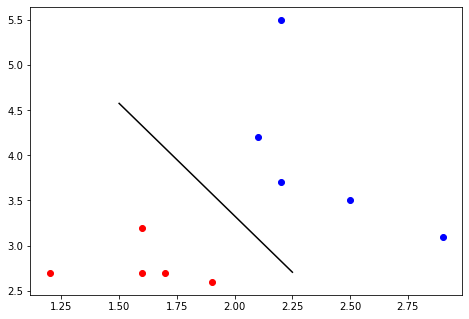

1.0


In [4]:

X_train = np.array([[1.6,3.2],[1.7,2.7],[1.6,2.7],[1.9,2.6],[1.2,2.7],[2.5,3.5],[2.2,5.5],[2.1,4.2],[2.9,3.1],[2.2,3.7]])
y_train = np.array([-1,-1,-1,-1,-1,1,1,1,1,1])
svm = SVC(learning_rate=0.1, lambda_param=0.1,n_iters=5000)
svm.fit(X_train, y_train)


fig=plt.figure()
ax=fig.add_axes([0,0,1,1])
ax.scatter(X_train[:5,0], X_train[:5,1], color='r')
ax.scatter(X_train[5:,0], X_train[5:,1], color='b')


x = np.linspace(1.5,2.25)
y = (svm.b - svm.w[0]*x)/svm.w[1]

plt.plot(x,y, '-k')

plt.show()
print(svm.score(X_train, y_train))